#Project: Application of RFM model in customer segmentation

### RFM model overview:
RFM Model (Recency, Frequency, Monetary) is an essential tool in marketing and data analysis, helping to classify customers based on their purchasing behavior. RFM Model uses three crucial metrics to evaluate each customer:

- Recency (R): Time since the customer's last purchase. The more recent a customer buys (, the lower the Recency), the more likely they are to show an interest in your product or service.

- Frequency (F): The frequency of customer purchases in a certain period. The more often a customer makes a purchase (the higher the frequency), the more likely they are to be considered loyal.

- Monetary (M): Total purchase value of customers in a certain period. The more money a customer spends (, the higher the monetary), the more likely they are to consider them a high-value customer.

RFM Model divides customers into groups based on R, F, and M metrics, helping businesses identify and optimize marketing and customer care strategies.

### Import Libaries & reading dataset

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data from two files 'Customer_Demographic_Clean.csv' and 'Transaction_Clean.csv'
customer_demographic = pd.read_csv('Customer_Demographic_Clean.csv', encoding='utf-8')
transaction_data = pd.read_csv('Transaction_Clean.csv', encoding='utf-8')

In [4]:
# Merge two DataFrames based on column 'customer_id'
df_customer = pd.merge(customer_demographic, transaction_data, on='customer_id')

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19354 non-null  int64  
 1   first_name                           19354 non-null  object 
 2   last_name                            19354 non-null  object 
 3   gender                               19354 non-null  object 
 4   past_3_years_bike_related_purchases  19354 non-null  int64  
 5   DOB                                  19354 non-null  object 
 6   job_title                            19354 non-null  object 
 7   job_industry_category                19354 non-null  object 
 8   wealth_segment                       19354 non-null  object 
 9   deceased_indicator                   19354 non-null  object 
 10  owns_car                             19354 non-null  object 
 11  tenure                      

The columns 'DOB' and 'transaction_date' now have the data type 'object', which is usually the data type for strings in Pandas. To convert them to the correct data type 'datetime', I can use Pandas' pd.to_datetime() method.

In [6]:
# Convert 'DOB' and 'transaction_date' columns to datetime data type
df_customer['DOB'] = pd.to_datetime(df_customer['DOB'])
df_customer['transaction_date'] = pd.to_datetime(df_customer['transaction_date'])

# Check data type after conversion
print(df_customer.dtypes)

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
Age                                             int64
address                                        object
postcode                                      float64
state                                          object
country                                        object
property_valuation                            float64
transaction_id              

Tạo DataFrame df_rfm để lưu thông tin của các điểm RFM và các phần tử Recency, Frequency và Monetary theo từng customer_id.

In [7]:
# Create DataFrame df_rfm to store information of RFM . points
df_rfm = df_customer[['customer_id','gender', 'DOB', 'past_3_years_bike_related_purchases', 'transaction_date', 'list_price', 'profit']].copy()

# Calculate Recency for each customer
current_date = pd.to_datetime('2023-07-30')
df_rfm['Recency'] = (current_date - df_rfm['transaction_date']).dt.days

# Calculate Frequency for each customer
df_rfm_frequency = df_rfm.groupby('customer_id')['transaction_date'].count().reset_index()
df_rfm_frequency.rename(columns={'transaction_date': 'Frequency'}, inplace=True)
df_rfm = pd.merge(df_rfm, df_rfm_frequency, on='customer_id', how='left')

# Calculate Monetary for each customer
df_rfm_monetary = df_rfm.groupby('customer_id')['list_price'].sum().reset_index()
df_rfm_monetary.rename(columns={'list_price': 'Monetary'}, inplace=True)
df_rfm = pd.merge(df_rfm, df_rfm_monetary, on='customer_id', how='left')


In this step, we have created DataFrame df_rfm to store information on RFM points and Recency, Frequency, and Monetary elements for each customer_id.
First, we copy the columns 'customer_id,' 'DOB,' 'past_3_years_bike_related_purchases', 'transaction_date,' 'list_price,' and 'profit' from df_customer to df_rfm.

Next, we calculate the Recency for each customer by calculating the number of days since the last purchase (from the current date '2023-07-30') and save the result in the 'Recency' column.

Then we calculate the Frequency for each customer by grouping the data by 'customer_id' and count the number of transactions (Frequency of purchase) and save the result in the 'Frequency' column.

Finally, we calculate the Monetary for each customer by grouping the data by 'customer_id', calculating the total transaction value (total purchase amount), and storing the result in the 'Monetary' column.

### Continue the rest of the process to calculate the RFM score and categorize customers into 'Customer_Title'groups.

In [8]:
# Calculate the quartiles of Recency, Frequency and Monetary
recency_quartiles = df_rfm['Recency'].quantile(q=[0, 0.25, 0.5, 0.75, 1]).values
frequency_quartiles = df_rfm['Frequency'].quantile(q=[0, 0.25, 0.5, 0.75, 1]).values
monetary_quartiles = df_rfm['Monetary'].quantile(q=[0, 0.25, 0.5, 0.75, 1]).values

# Calculate RFM points for each customer
df_rfm['R_Score'] = 4 - pd.qcut(df_rfm['Recency'], q=4, labels=False, duplicates='drop')
df_rfm['F_Score'] = pd.qcut(df_rfm['Frequency'], q=4, labels=False)
df_rfm['M_Score'] = pd.qcut(df_rfm['Monetary'], q=4, labels=False)

# Save the fractional values of Recency, Frequency and Monetary in df_rfm
df_rfm['Recency_Quartiles'] = pd.qcut(df_rfm['Recency'], q=4, labels=False).map({0: 'Q1', 1: 'Q2', 2: 'Q3', 3: 'Q4'})
df_rfm['Frequency_Quartiles'] = pd.qcut(df_rfm['Frequency'], q=4, labels=False).map({0: 'Q1', 1: 'Q2', 2: 'Q3', 3: 'Q4'})
df_rfm['Monetary_Quartiles'] = pd.qcut(df_rfm['Monetary'], q=4, labels=False).map({0: 'Q1', 1: 'Q2', 2: 'Q3', 3: 'Q4'})

# Create assign_customer_title function and apply to calculate Customer_Title for each customer
def assign_customer_title(row):
     if row['R_Score'] in [3, 2, 1, 0] and row['F_Score'] in [0, 1] and row['M_Score'] in [0, 1]:
         return 'Bronze'
     elif row['R_Score'] in [3, 2] and row['F_Score'] in [2, 3] and row['M_Score'] in [2, 3, 4]:
         return 'Silver'
     elif row['R_Score'] in [4] and row['F_Score'] in [0, 1, 2, 3] and row['M_Score'] in [0, 1, 2, 3, 4]:
         return 'Gold'
     elif row['R_Score'] in [4] and row['F_Score'] in [4] and row['M_Score'] in [0, 1, 2, 3, 4]:
         return 'Platinum'
     else:
         return 'Others'

df_rfm['Customer_Title'] = df_rfm.apply(assign_customer_title, axis=1)



Calculate RFM points for each customer: I have used the qcut() method to divide the Recency, Frequency, and Monetary columns data into four elements based on the quartile values calculated in the previous step. Then, use the labels=False method to get numeric values instead of labels for each point and duplicates='drop' to remove duplicates, if any. This result helps you calculate each customer's R_Score, F_Score, and M_Score.

- **Saving string quartile values to a DataFrame:** You used the map() method to map the quartile's numerical values to the strings 'Q1', 'Q2', 'Q3', and 'Q4' and save them to columns Recency_Quartiles, Frequency_Quartiles and Monetary_Quartiles in the DataFrame df_rfm.

- **Create assign_customer_title() function to classify customers:** You have created an assign_customer_title() function that classifies each customer into 'Bronze', 'Silver', 'Gold', and 'Platinum' groups based on their RFM Score. This function will return the label corresponding to each RFM Score.

- **Apply the assign_customer_title() function to each row of the DataFrame:** You used the apply() method with the parameter axis=1 to apply the assign_customer_title() function to each row (customer) of the DataFrame df_rfm and save the result in a column Customer_Title.

Now, the DataFrame df_rfm contains the information about the customer's Recency, Frequency, and Monetary, along with the RFM Score and the customer classification (Customer_Title) based on the RFM Score.

In [9]:
df_rfm['Customer_Title'].value_counts()

Bronze    6156
Gold      4867
Others    4271
Silver    4060
Name: Customer_Title, dtype: int64

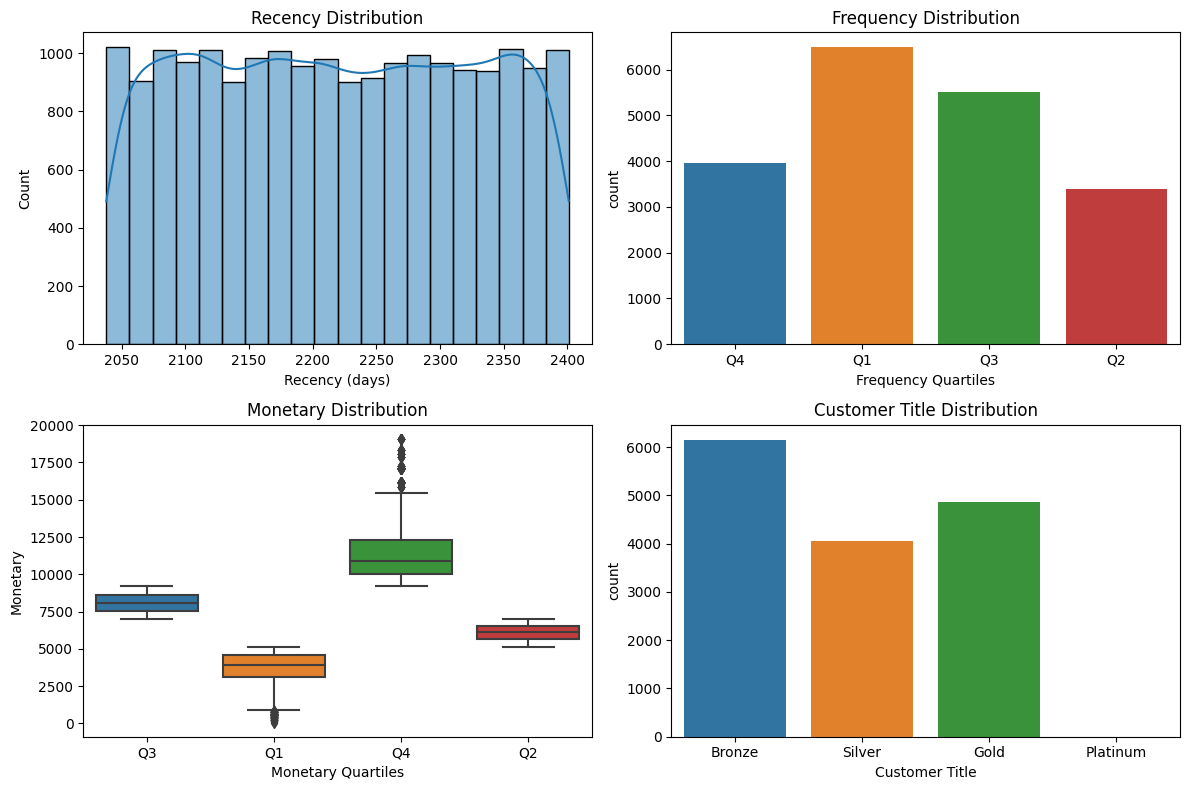

In [10]:
# Initialize figures and axes for subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Recency chart
sns.histplot(df_rfm['Recency'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Recency Distribution')
axes[0, 0].set_xlabel('Recency (days)')

# Histogram Frequency
sns.countplot(x='Frequency_Quartiles', data=df_rfm, ax=axes[0, 1])
axes[0, 1].set_title('Frequency Distribution')
axes[0, 1].set_xlabel('Frequency Quartiles')

# Monetary chart
sns.boxplot(x='Monetary_Quartiles', y='Monetary', data=df_rfm, ax=axes[1, 0])
axes[1, 0].set_title('Monetary Distribution')
axes[1, 0].set_xlabel('Monetary Quartiles')
axes[1, 0].set_ylabel('Monetary')

# Customer_Title . chart
sns.countplot(x='Customer_Title', data=df_rfm, ax=axes[1, 1], order=['Bronze', 'Silver', 'Gold', 'Platinum'])
axes[1, 1].set_title('Customer Title Distribution')
axes[1, 1].set_xlabel('Customer Title')

# Show chart
plt.tight_layout()
plt.show()

- **Recency Distribution:** Use a histogram to represent the distribution of Recency (number of days since last purchase) in a DataFrame df_rfm. The code uses sns.histplot() to generate a histogram with 20 bins and KDE (Kernel Density Estimation) to estimate the probability density function.

- **Frequency Distribution:** Use a bar plot (countplot) to represent the distribution of Frequency based on Quartiles. The code uses sns.countplot() and passes data from the 'Frequency_Quartiles' column in the DataFrame df_rfm.

- **Monetary Distribution:** Use the box plot to show the distribution of the Monetary (value of money spent) based on the Quartiles. The code snippet uses sns.boxplot() and passes data from the 'Monetary_Quartiles' column as the x-axis and the 'Monetary' column as the y-axis.

- **Customer Title Distribution:** Use a bar plot (countplot) to show the distribution of Customer Title based on groups ['Bronze', 'Silver', 'Gold' ', 'Platinum']. The code snippet uses sns.countplot() and passes data from the 'Customer_Title' column in the DataFrame df_rfm.

- **Show charts:** Use plt.tight_layout() to align the charts so they don't overlap, and use plt.show() to show all charts.

With the above code, We will have a figure of 2x2 subplot containing histograms showing the distribution and classification based on the RFM Score of the DataFrame df_rfm.

### Grouping Age base on DOB

In [11]:
# Calculate age and add column 'Age' to df_rfm
df_rfm['Age'] = (current_date - df_rfm['DOB']).dt.days // 365

In [12]:
df_rfm

,customer_id,gender,DOB,past_3_years_bike_related_purchases,transaction_date,list_price,profit,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Recency_Quartiles,Frequency_Quartiles,Monetary_Quartiles,Customer_Title,Age
0,1,Female,1953-10-12,93,2017-12-23,235.63,110.56,2045,11,9084.45,4,3,2,Q1,Q4,Q3,Gold,69
1,1,Female,1953-10-12,93,2017-04-06,1577.53,751.02,2306,11,9084.45,2,3,2,Q3,Q4,Q3,Silver,69
2,1,Female,1953-10-12,93,2017-05-11,1720.70,189.28,2271,11,9084.45,2,3,2,Q3,Q4,Q3,Silver,69
3,1,Female,1953-10-12,93,2017-01-05,360.40,90.10,2397,11,9084.45,1,3,2,Q4,Q4,Q3,Others,69
4,1,Female,1953-10-12,93,2017-02-21,71.49,17.87,2350,11,9084.45,1,3,2,Q4,Q4,Q3,Others,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,3500,Female,1967-07-21,71,2017-01-09,792.90,198.22,2393,6,4922.41,1,1,0,Q4,Q2,Q1,Bronze,56
19350,3500,Female,1967-07-21,71,2017-02-16,1228.07,827.16,2355,6,4922.41,1,1,0,Q4,Q2,Q1,Bronze,56
19351,3500,Female,1967-07-21,71,2017-08-08,1311.44,144.26,2182,6,4922.41,3,1,0,Q2,Q2,Q1,Bronze,56
19352,3500,Female,1967-07-21,71,2017-01-11,60.34,15.08,2391,6,4922.41,1,1,0,Q4,Q2,Q1,Bronze,56


### Define get_customer_segment function to return the corresponding category based on the RFM Score

In [13]:
# Define get_customer_segment function to return the corresponding category based on the RFM Score
def get_customer_segment(row):
     rfm_score = int(str(row['R_Score']) + str(row['F_Score']) + str(row['M_Score']))
     if rfm_score >= 444:
         return 'Platinum Customer'
     elif rfm_score >= 433 and rfm_score < 444:
         return 'Very Loyal'
     elif rfm_score >= 421 and rfm_score < 433:
         return 'Becoming Loyal'
     elif rfm_score >= 344 and rfm_score < 421:
         return 'Recent Customer'
     elif rfm_score >= 323 and rfm_score < 344:
         return 'Potential Customer'
     elif rfm_score >= 311 and rfm_score < 323:
         return 'Late Bloomer'
     elif rfm_score >= 224 and rfm_score < 311:
         return 'Loosing Customer'
     elif rfm_score >= 212 and rfm_score < 224:
         return 'High Risk Customer'
     elif rfm_score >= 124 and rfm_score < 212:
         return 'Almost Lost Customer'
     elif rfm_score >= 112 and rfm_score < 124:
         return 'Evasive Customer'
     else:
         return 'Lost Customer'

In [14]:
# Apply the get_customer_segment function to calculate the taxonomy for each customer and save the result in the 'customer_segmentation' column
df_rfm['customer_segmentation'] = df_rfm.apply(get_customer_segment, axis=1)

In [15]:
df_rfm.head()

,customer_id,gender,DOB,past_3_years_bike_related_purchases,transaction_date,list_price,profit,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Recency_Quartiles,Frequency_Quartiles,Monetary_Quartiles,Customer_Title,Age,customer_segmentation
0,1,Female,1953-10-12,93,2017-12-23,235.63,110.56,2045,11,9084.45,4,3,2,Q1,Q4,Q3,Gold,69,Becoming Loyal
1,1,Female,1953-10-12,93,2017-04-06,1577.53,751.02,2306,11,9084.45,2,3,2,Q3,Q4,Q3,Silver,69,Loosing Customer
2,1,Female,1953-10-12,93,2017-05-11,1720.70,189.28,2271,11,9084.45,2,3,2,Q3,Q4,Q3,Silver,69,Loosing Customer
3,1,Female,1953-10-12,93,2017-01-05,360.40,90.10,2397,11,9084.45,1,3,2,Q4,Q4,Q3,Others,69,Almost Lost Customer
4,1,Female,1953-10-12,93,2017-02-21,71.49,17.87,2350,11,9084.45,1,3,2,Q4,Q4,Q3,Others,69,Almost Lost Customer


### Visualizing Customer segmentation base on 'df_rfm'

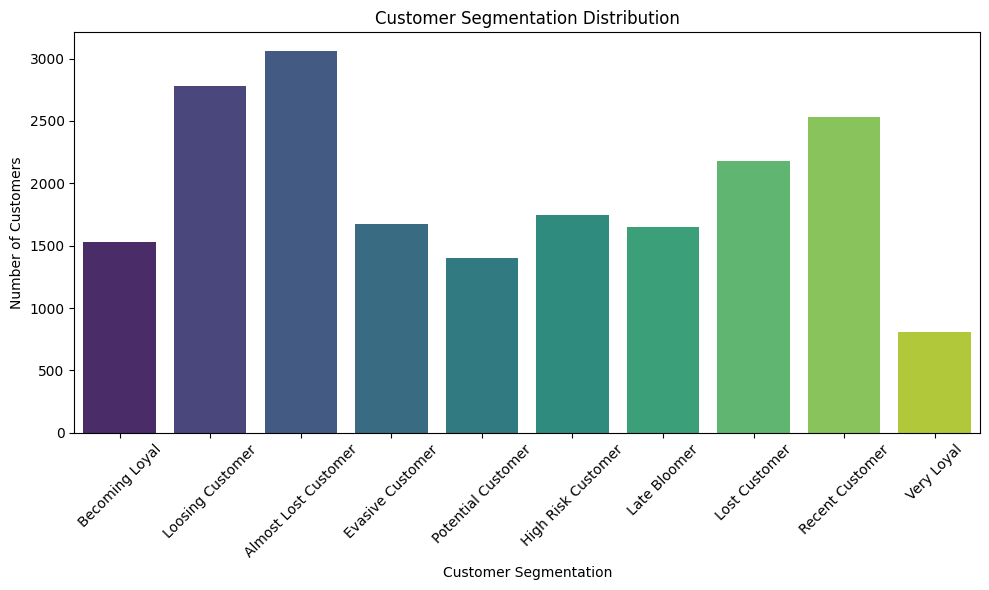

In [16]:
# Visualize data with column charts
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_segmentation', data=df_rfm, palette='viridis')
plt.xlabel('Customer Segmentation')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Exploration & Comaparing Old and New Customer

In [17]:
# Read data from two files 'NewCustomer_Cleaned.csv'
df_newcustomer = pd.read_csv('NewCustomer_Cleaned.csv', encoding='utf-8')

In [18]:
df_newcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           983 non-null    object 
 1   last_name                            983 non-null    object 
 2   gender                               983 non-null    object 
 3   past_3_years_bike_related_purchases  983 non-null    int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            983 non-null    object 
 6   job_industry_category                983 non-null    object 
 7   wealth_segment                       983 non-null    object 
 8   deceased_indicator                   983 non-null    object 
 9   owns_car                             983 non-null    object 
 10  tenure                               983 non-null    int64  
 11  address                         

In [19]:
# Convert column 'DOB' to datetime data type
df_newcustomer['DOB'] = pd.to_datetime(df_newcustomer['DOB'])

In [20]:
df_newcustomer[['Rank','Value']].value_counts()

Rank  Value   
760   0.637500    13
259   1.062500    12
455   0.892500     9
386   0.945625     9
133   1.237500     9
                  ..
602   0.773500     1
794   0.605625     1
793   0.610938     1
603   0.770312     1
1000  0.340000     1
Length: 324, dtype: int64

### Correlation coefficient between two columns 'Rank' and 'Value'

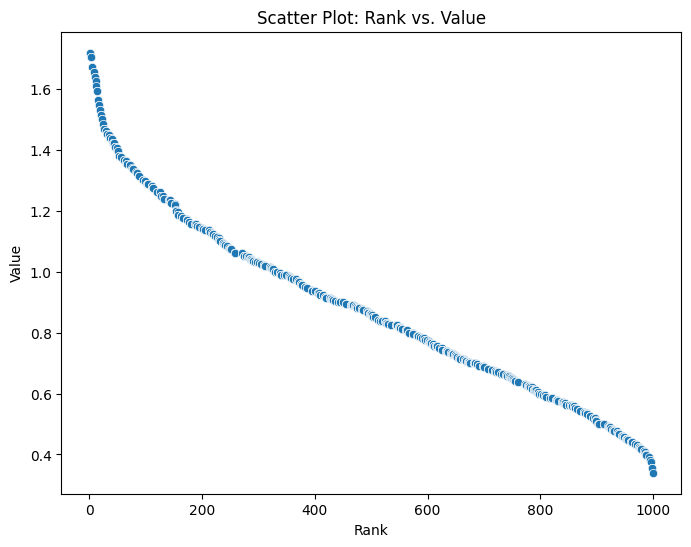

Pearson correlation coefficient between 'Rank' and 'Value': -0.9840015999360192


In [21]:
# Visualize the correlation between 'Rank' and 'Value' using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_newcustomer, x='Rank', y='Value')
plt.title("Scatter Plot: Rank vs. Value")
plt.xlabel("Rank")
plt.ylabel("Value")
plt.show()

# Calculate Pearson correlation coefficient between 'Rank' and 'Value'
correlation_coefficient = df_newcustomer['Rank'].corr(df_newcustomer['Value'])
print(f"Pearson correlation coefficient between 'Rank' and 'Value': {correlation_coefficient}")


Based on the Pearson correlation coefficient between two columns 'Rank' and 'Value', which is -0.9840015999360192, we can see that these two columns strongly correlate. The value of this correlation coefficient is close to -1; when the value of 'Rank' increases, the value of 'Value' decreases and vice versa.

This strong correlation can cause a strong covariate between 'Rank' and 'Value', causing the information in these two columns to overlap and not bring much new information. Keeping these two columns can make the RFM model unbalanced and quickly lead to overfitting, as well as increase the complexity of the model.

Therefore, the decision to drop two columns, 'Rank' and 'Value' is reasonable and will help build the RFM model and customer segmentation more efficiently and accurately.

In [22]:
# Drop two columns 'Rank' and 'Value' in DataFrame 'df_new_customer'
df_newcustomer = df_newcustomer.drop(['Rank', 'Value'], axis=1)

### Comparing Age of Old & New customers

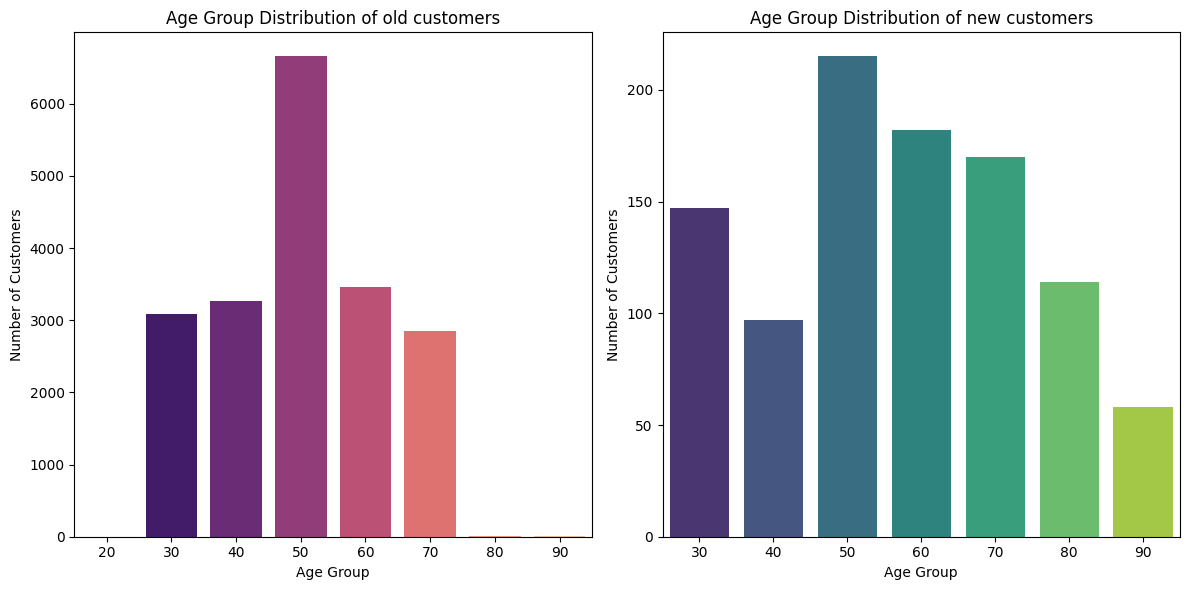

In [23]:
# Divide age groups and draw a chart to count the number of customers by age group (Age Group)
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20', '30', '40', '50', '60', '70', '80', '90']
df_rfm['Age_Group'] = pd.cut(df_rfm['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(12, 6))

# Create the first subplot for df_rfm's age-group distribution chart
plt.subplot(1, 2, 1)
sns.countplot(x='Age_Group', data=df_rfm, palette='magma')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Age Group Distribution of old customers')

# Create a second subplot for df_newcustomer's chart of new customers by age group
plt.subplot(1, 2, 2)
sns.countplot(data=df_newcustomer, x='Age_Group', palette='viridis')
plt.title('Age Group Distribution of new customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

plt.tight_layout() # To avoid crowding out information between subplots
plt.show()

### Exporting df_rfm file

In [24]:
# Lưu DataFrame df_rfm vào file Excel
df_rfm.to_excel('df_rfm.xlsx', index=False)